Recall! You must copy this notebook to your own Drive before using!

# **Basic Linear Regression with Python**

## **Connect To Your Google Drive**

Here we want to ensure you're able to connect to google drive. If you are unable to connect, try using a different browser like Safari or Edge.

In [1]:
from os import environ
from google.colab import drive

# if we are starting here we need to remount our drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### So Mounting Your Drive Programmatically Has Failed...

If you, like me, and have had trouble like above connecting to Google Drive, fear not! Alternative routes exist. Follow these instructions:



1.   Go to `View` located at the top ribbon within the notebook (between `Edit` and `Insert`).
2.   Select `Table of Contents`
3.   Click on the `file` icon as seen below:

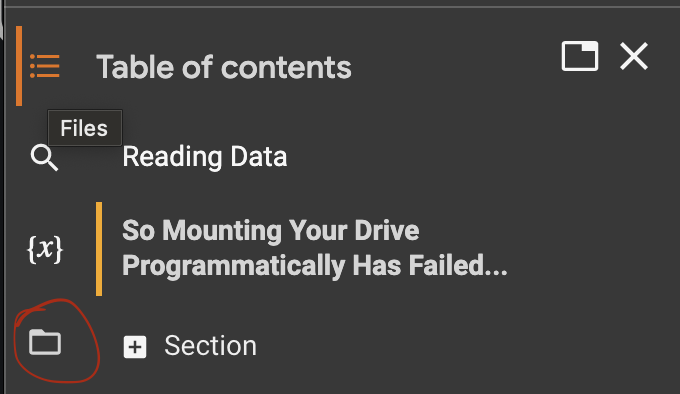

4.   Mount Drive!

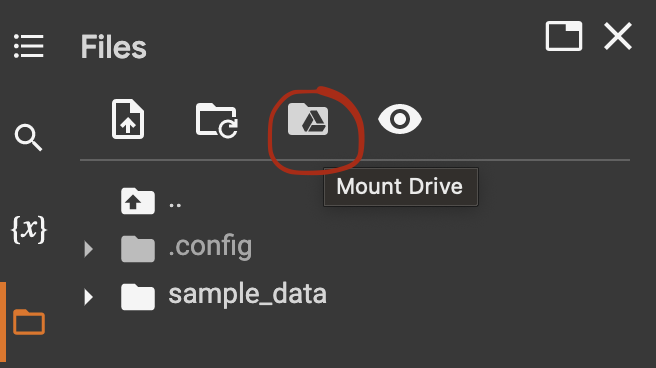

## Linear Regression, Broken Down So Far

Let's summarize what we've learned so far more concisely 😅

In parentheses () are the data science/machine learning equivalent terms to what we have learnt so far! (You will want to know these.)

1. **Dependent Variable (Target)**
- What it is: The thing you're trying to predict or explain.
- Lay Term: Imagine you're trying to guess how much you'll earn in a lemonade stand; the money you make is the dependent variable.
2. **Independent Variables (Features)**
- What it is: The factors that you think will influence your dependent variable.
- Lay Term: In the lemonade stand example, things like weather, price, and location could affect your earnings. These are your independent variables.
3. **Linear Relationship**
- What it is: The assumption that a change in the independent variables will result in a proportional change in the dependent variable.
- Lay Term: If you think that selling each additional cup of lemonade will add a fixed amount to your earnings, you're assuming a linear relationship.
4. **Coefficients (Parameters)**
- What it is: The numerical values that represent the impact of each independent variable.
- Lay Term: These numbers tell you how much your earnings will increase (or decrease) for each additional cup of lemonade sold, or for each degree rise in temperature, and so on.
5. **Intercept (Constant)**
- What it is: The value of the dependent variable when all independent variables are zero.
- Lay Term: This is like your base earnings when you haven't sold any lemonade yet but might have some money in the jar to encourage others to contribute.
6. **Error Term (Loss [sometimes])**
- What it is: The difference between the predicted value and the actual value for each data point. The aim is to minimize the **sum of the squares of these errors**, often referred to as **"least squares."**
- Lay Term: Imagine you're throwing darts. The error term is like the distance between where your dart actually lands and the bullseye. Just as you aim to get your darts as close to the bullseye as possible, the model aims to minimize these errors to make more accurate predictions.

## Model Assumptions

In machine learning and data science, every model has **assumptions** about how the world works! Why? Because, *a model is a simplified version of a complex, [stochastic](https://machinelearningmastery.com/stochastic-in-machine-learning/) world*.

Linear Regression is no different. Here are **some** of the assumptions of Linear Regression models. We will learn more about these soon!

| Assumption         | Lay Terms                  | Definition                                                                                                  | Rationale                                                                                               | Example                                                                 |
|--------------------|----------------------------|-------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------|
| Linearity          | Straight-Line Relationship | The relationship between the dependent and independent variables should be linear.                           | Simplifies the model and the computations, making them easier to interpret and understand.         | If you plot exam scores against hours studied, the points should form a straight line. |
| Independence       | Each Point Stands Alone    | Each data point should be independent of all other data points.                                              | Allows for the unbiased estimation of model parameters.                                           | In a study about employee satisfaction, each employee's data should be independent of others'. |
| Homoscedasticity   | Constant Spread            | The spread of the residuals (errors) should be constant across all levels of the independent variables.      | Ensures equal influence of all data points on the model.                                          | In a plot of residuals against predicted values, the spread of points should be even. |
| Normality of Errors| Errors Should Follow a Bell Curve | The errors should be normally distributed, especially important for hypothesis testing.                      | Required for making statistical inferences from the model.                                        | If you plot the errors, they should form a bell-shaped curve. |
| No or Little Multicollinearity | Independent Features | Independent variables should be independent from each other, or at least not highly correlated.               | Ensures each feature's individual effect can be isolated and understood.                           | Height in inches and height in centimeters would be highly correlated, which is problematic. |
| No Endogeneity     | No "Chicken and Egg" Problem | The error term should not be a function of the independent variables.                                         | Prevents bias in the estimation of model parameters.                                              | If you're studying how tutoring impacts grades, the decision to get a tutor shouldn't be based on the grade. |
| No Outliers        | No Extreme Values           | Outliers can have a disproportionate impact on the line of best fit.                                          | Ensures the model is representative of the general trend and not skewed by extreme values.        | An exceptionally old house in a dataset of house prices could skew results. |

## Using scikit-learn for Linear Regression

**What is scikit-learn?**

Scikit-learn is a Python library that provides simple and efficient tools for data analysis and modeling tasks. It's like a Swiss Army knife for data scientists!

More about scitkit learn [here](https://scikit-learn.org/stable/getting_started.html).

**When to Use It?**

- When you need to classify things (like spam emails vs. non-spam).
- When you want to predict a number (like the price of a house).
- When you want to cluster similar items (like customer segments).






#### Step 1: Import the Library

First, let's import the `LinearRegression` model from scikit-learn.

```python
from sklearn.linear_model import LinearRegression
```

#### Step 2: Prepare the Data

Assume `df` is our DataFrame and it has columns `weight`, `horsepower`, and `MPG`
```python
X = df[['weight', 'horsepower']]  # Features a.k.a X
y = df['MPG']  # Target a.k.a. y
```
*Note*: We often denote features in python a `X` and target values as `y`. Better to stick with this convention.

#### Step 3: Create and Fit the Model

Now we create a new Linear Regression model and "fit" it to our data. "Fitting" is like tuning a guitar; it adjusts the model to match the data as closely as possible.

```python
# Create a new model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)
```

####Step 4: Make Predictions

Once the model is fitted, we can use it to make predictions.

```python
# Predict MPG for a new car with weight 3000 and horsepower 150
new_car = [[3000, 150]] # notice we ONLY provide X features!
predicted_MPG = model.predict(new_car)
print(f'The predicted MPG for the new car is {predicted_MPG[0]:.2f}')
```

### **Let's Implement It Together**

Using the IMDB dataset, let's see if we can predict `gross` (our target `y`) from two variables: `budget` and `duration` (our `X` features).

In [2]:
from pandas import read_csv

file_path = "/content/drive/MyDrive/Work/Chapman/MGSC_310/MGSC_310_shared_files_and_resources/Data/IMDB_movies.csv"

movies = read_csv(file_path)

movies.head()

,movie_title,director_name,gross,budget,country,title_year,imdb_score,language,duration,genres,...,director_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,num_user_for_reviews,num_critic_for_reviews,num_voted_users
0,Avatar,James Cameron,760505847,237000000,USA,2009,7.9,English,178.0,Action|Adventure|Fantasy|Sci-Fi,...,0,4834,0.0,1000.0,CCH Pounder,936.0,Joel David Moore,3054,723.0,886204
1,Pirates of the Caribbean: At World's End,Gore Verbinski,309404152,300000000,USA,2007,7.1,English,169.0,Action|Adventure|Fantasy,...,563,48350,0.0,40000.0,Johnny Depp,5000.0,Orlando Bloom,1238,302.0,471220
2,Spectre,Sam Mendes,200074175,245000000,UK,2015,6.8,English,148.0,Action|Adventure|Thriller,...,0,11700,1.0,11000.0,Christoph Waltz,393.0,Rory Kinnear,994,602.0,275868
3,The Dark Knight Rises,Christopher Nolan,448130642,250000000,USA,2012,8.5,English,164.0,Action|Thriller,...,22000,106759,0.0,27000.0,Tom Hardy,23000.0,Christian Bale,2701,813.0,1144337
4,John Carter,Andrew Stanton,73058679,263700000,USA,2012,6.6,English,132.0,Action|Adventure|Sci-Fi,...,475,1873,1.0,640.0,Daryl Sabara,632.0,Samantha Morton,738,462.0,212204


In [ ]:
from sklearn.linear_model import LinearRegression

X = movies[['budget', 'duration']] # features
y = movies['gross'] # target

# Fitting a linear regression model using scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X, y) # find the best fitting line!
y_pred = lin_reg.predict(X) # get the results!

ValueError: ignored

### **Dealing With Errors, a Critical Skill**

We started to implement our Regression but ran into an error. This will happen **all the time**. You CANNOT do data science and machine learning well in a business setting without learning how to handle errors. We will not shy away from them in this class.

---

#### **Understanding Stack Traces: A Quick Guide for Beginners**

##### **What is a Stack Trace?**

A stack trace is like a breadcrumb trail that shows you the sequence of function calls leading up to an error in your code. It helps you pinpoint where things went wrong.

##### **How to Read a Stack Trace?**

1. **Start from the Bottom**: The actual error is usually at the bottom of the stack trace.
2. **Follow the Arrows**: Arrows (`-->`) often point to the line where the error occurred.
3. **Look for File Names and Line Numbers**: These tell you where in your code the error happened.

##### **Common Errors in Python**

| Error Name      | Meaning                                                   | Example Situation                         |
|-----------------|-----------------------------------------------------------|-------------------------------------------|
| `TypeError`     | Wrong data type used                                       | Adding a string to a number               |
| `ValueError`    | Invalid value for a function or operation                  | Trying to convert a letter to an integer  |
| `NameError`     | Using a variable or function name that hasn't been defined | Using `x` before setting `x = 10`         |
| `IndexError`    | Trying to access an index that doesn't exist in a list     | Accessing the 5th element in a 4-item list|
| `KeyError`      | Trying to access a dictionary key that doesn't exist       | Looking up a non-existent key in a dictionary|
| `ZeroDivisionError` | Dividing by zero                                        | `5 / 0`                                   |

##### **Tips for Debugging**

1. **Read the Error Message**: It often contains hints on what went wrong.
2. **Check the Line Number**: Go to the line in your code where the error occurred and look for issues.
3. **Google the Error**: If you're stuck, chances are someone else has had the same problem. Google can be your best friend!


#### **Breaking Down the Stack Trace**

##### **The Error Message**

The first thing to notice is the type of error:

```markdown
ValueError: Input X contains NaN.
```

This tells us that we're dealing with a `ValueError`, and it's happening because the input \( X \) contains `NaN` (Not a Number) values.

##### **Where Did the Error Occur?**

Next, look at the line where the error occurred:

```markdown
----> 8 lin_reg.fit(X, y) # find the best fitting line!
```

This tells us that the error happened at line 8 of your code, where the `fit()` method is called on the `LinearRegression` object.

##### **Digging Deeper**

Finally, the error message provides additional information about the problem:

```markdown
LinearRegression does not accept missing values encoded as NaN natively.
```

This part of the message gives us clues about how to fix the error. It tells us that `LinearRegression` does not natively handle `NaN` values and suggests some possible solutions.

##### **Possible Solutions**

The message also provides some suggestions for how to handle the issue:

1. Use estimators (models) that handle `NaN` values.
2. Preprocess the data to handle `NaN` values.

##### **Summary**

To debug this error, you could:

1. Check if \( X \) contains `NaN` values.
2. Decide on a strategy for handling these `NaN` values (e.g., imputation, removal).
3. Re-run the code.


In [3]:
# Let's find where there is a missing value
movies[movies['budget'].isna()].head() # looks like budget is fine!

,movie_title,director_name,gross,budget,country,title_year,imdb_score,language,duration,genres,...,director_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,num_user_for_reviews,num_critic_for_reviews,num_voted_users


In [4]:
movies[movies['duration'].isna()].head() # aha! duration contains an NaN. Let's drop this data point to fix this problem

,movie_title,director_name,gross,budget,country,title_year,imdb_score,language,duration,genres,...,director_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,num_user_for_reviews,num_critic_for_reviews,num_voted_users
3582,Dil Jo Bhi Kahey...,Romesh Sharma,129319,70000000,India,2005,5.1,English,NaN,Romance,...,0,622,4.0,421.0,Annabelle Wallis,96.0,Revathy,4,4.0,257


In [5]:
from sklearn.linear_model import LinearRegression

movies_without_nans = movies[['budget', 'duration', 'gross']].dropna(how='any') # features THAT DON'T contain NaNs

X = movies_without_nans[['budget', 'duration']]
y = movies_without_nans['gross'] # target

# Fitting a linear regression model using scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X, y) # find the best fitting line!
y_pred = lin_reg.predict(X) # get the results!

In [6]:
y_pred

array([1.07868268e+08, 1.02719790e+08, 8.53167879e+07, ...,
       2.79380348e+07, 3.85617272e+07, 3.47673596e+07])

### **Back To Regression**

*Note: Know how to read and interpret linear equations!


```python
X = movies_without_nans[['budget', 'duration']] # features
y = movies_without_nans['gross'] # target
```
Translates to:

```markdown
gross = β_0 + β_1 * budget + β_2 * duration
```

In [7]:
# Adding predictions BACK to the DataFrame
movies_without_nans['y_pred'] = y_pred
movies_without_nans.head() # notice our new dataframe column

,budget,duration,gross,y_pred
0,237000000,178.0,760505847,1.078683e+08
1,300000000,169.0,309404152,1.027198e+08
2,245000000,148.0,200074175,8.531679e+07
3,250000000,164.0,448130642,9.759150e+07
4,263700000,132.0,73058679,7.367445e+07


In [8]:
# Importing Plotly for 3D interactive plotting
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Create a meshgrid for Budget and Duration
x = np.linspace(movies_without_nans['budget'].min(), movies_without_nans['budget'].max(), num=50)
y = np.linspace(movies_without_nans['duration'].min(), movies_without_nans['duration'].max(), num=50)
xx, yy = np.meshgrid(x, y)
new_data = np.c_[xx.ravel(), yy.ravel()]

# Use the fitted model to make predictions
zz = lin_reg.predict(new_data)
zz = zz.reshape(xx.shape)

# Create scatter plot for actual data points
scatter = go.Scatter3d(
    x=movies_without_nans['budget'],
    y=movies_without_nans['duration'],
    z=movies_without_nans['gross'],
    mode='markers',
    marker=dict(
        size=4,
        color='red',
    ),
    name='Actual'
)

# Create surface plot for the predicted plane
surface = go.Surface(x=xx, y=yy, z=zz, colorscale='Viridis', opacity=0.5, name='Predicted Plane')

# Combine scatter and surface plots
layout = go.Layout(
    title='3D Plane of Best Fit for Gross Earnings',
    scene=dict(
        xaxis_title='Budget',
        yaxis_title='Duration',
        zaxis_title='Gross'
    )
)

fig = go.Figure(data=[scatter, surface], layout=layout)

# Show plot
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Getting More Statistical With Our Regression**

Sometimes we want to get more "technical" or stastical for our predictions. It's at those times we want to use the library `statsmodels`. For more on `statsmodels` see [here](https://www.statsmodels.org/stable/index.html).

In [ ]:
import statsmodels.api as sm

X = movies_without_nans[['budget', 'duration']] # features
y = movies_without_nans['gross'] # target

# Add a constant to the features (Statsmodels doesn't add a constant by default)
X_with_const = sm.add_constant(X)

# Create and fit the model
model = sm.OLS(y, X_with_const).fit()

# Display the summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           6.21e-63
Time:                        18:55:36   Log-Likelihood:                -75596.
No. Observations:                3888   AIC:                         1.512e+05
Df Residuals:                    3885   BIC:                         1.512e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.353e+07   5.34e+06     -6.283      0.0

### Concepts in the OLS Regression Summary Table

We will go over these concepts more moving forward, you do not need to know these today. Just exposing you to them.

| Name               | Definition  | Simple Definition  | Rationale  |
|--------------------|-------------|--------------------|------------|
| No. Observations   | Total number of observations in the dataset  | Sample size  | Determines the sample size  |
| Df Residuals       | Degrees of freedom of residuals  | Free pieces of information | Indicates the number of independent pieces of information  |
| Df Model           | Degrees of freedom of model  | Number of parameters | Indicates the number of parameters in the model  |
| Covariance Type    | Type of covariance matrix  | Method for uncertainty | Determines the method used to calculate uncertainty  |
| R-squared          | Coefficient of determination  | Goodness of fit | Explains the proportion of the variance  |
| Adj. R-squared     | Adjusted R-squared  | Unbiased goodness of fit | Provides a more unbiased measure  |
| F-statistic        | Test statistic for overall significance  | Model significance | Tests the null hypothesis  |
| Prob (F-statistic) | p-value of F-statistic  | Model p-value | Indicates the probability of F-statistic  |
| Log-Likelihood     | Logarithm of likelihood function  | Model probability | Measures the probability of y given x  |
| AIC                | Akaike's Information Criterion  | Model complexity | Penalizes the addition of extraneous predictors  |
| BIC                | Bayesian Information Criterion  | Model penalty | Higher penalty for more parameters  |
| Coef               | Estimated coefficients  | Impact of predictors | Quantifies the impact of each predictor  |
| Std Err            | Standard error of coefficients  | Coef. accuracy | Measures the accuracy of coefficients  |
| t                  | t-statistic for coef.  | Predictor significance | Tests predictor impact  |
| P>\|t\|            | p-value of t-statistic  | Predictor p-value | Indicates the probability of t-statistic  |
| Confidence Intervals | Confidence range for coef.  | Coef. range | Provides an interval estimate  |
| Omnibus            | Test for normality of residuals  | Residuals' shape | Checks if residuals are normally distributed  |
| Prob(Omnibus)      | p-value of Omnibus  | Residuals' p-value | Indicates the probability of Omnibus  |
| Durbin-Watson      | Test for autocorrelation of residuals  | Residuals' independence | Checks if residuals are independent  |
| Jarque-Bera (JB)   | Test for normality of residuals  | Residuals' shape | Another test for normal distribution of residuals  |
| Prob(JB)           | p-value of Jarque-Bera  | Residuals' p-value | Indicates the probability of Jarque-Bera  |
| Kurtosis           | "Tailedness" of residuals  | Shape of residuals | Describes the shape of distribution of residuals  |
| Cond No            | Condition number  | Matrix stability | Provides an index of stability and multicollinearity  |


Let's break this table down:


- **No. Observations**: There are 3888 samples in the model.

- **Df Residuals and Df Model**: With 3885 degrees of freedom for residuals and 2 for the model, it's a simple linear model with two predictors.

- **Covariance Type**: The model uses non-robust covariance type, which is the basic type for OLS regression.

- **R-squared and Adjusted R-squared**: Both are around 0.071, indicating that the model explains about 7.1% of the variance in the gross earnings.

- **F-Statistic and Prob (F-statistic)**: The F-statistic is 148.6 with a very low probability, suggesting that the model is statistically significant.

- **Log-Likelihood**, **AIC**, **BIC**: These are used for model comparison. Lower AIC and BIC are better, but they should be compared with those from other models.

- **Coefficients**: The coefficients tell us that for each unit increase in budget, the gross increases by about 0.027 units, and for each unit increase in duration, the gross increases by about 758,800 units.

- **Standard Error**, **t-value**, **p-value**: These tell us that both predictors are statistically significant as their p-values are below 0.05.

- **Confidence Intervals**: They give us a range in which the true parameter lies with 95% confidence.

- **Omnibus**, **Durbin-Watson**, **Jarque-Bera**: These statistical tests suggest that the residuals are not normally distributed (Omnibus, Jarque-Bera) and show no significant autocorrelation (Durbin-Watson).

- **Kurtosis and Condition Number**: The kurtosis is high, indicating heavy tails. The condition number is large, suggesting potential multicollinearity—a breaking of the assumpotion of Linear Regression.

Overall, while the model is statistically significant, it explains only a small portion of the variance in gross earnings. The residuals also violate some of the key assumptions like normality.